In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/suryasaikadali/Downloads/pw_skills/kaggle/insurance_prediction/artifacts/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [8]:
num_cols = [i for i in df.columns if df[i].dtype in ('float64','int64')]

In [9]:
num_cols

['age', 'bmi', 'children', 'expenses']

In [10]:
cat_cols = [i for i in df.columns if df[i].dtype == 'O']

In [11]:
cat_cols

['sex', 'smoker', 'region']

## Distribution of age

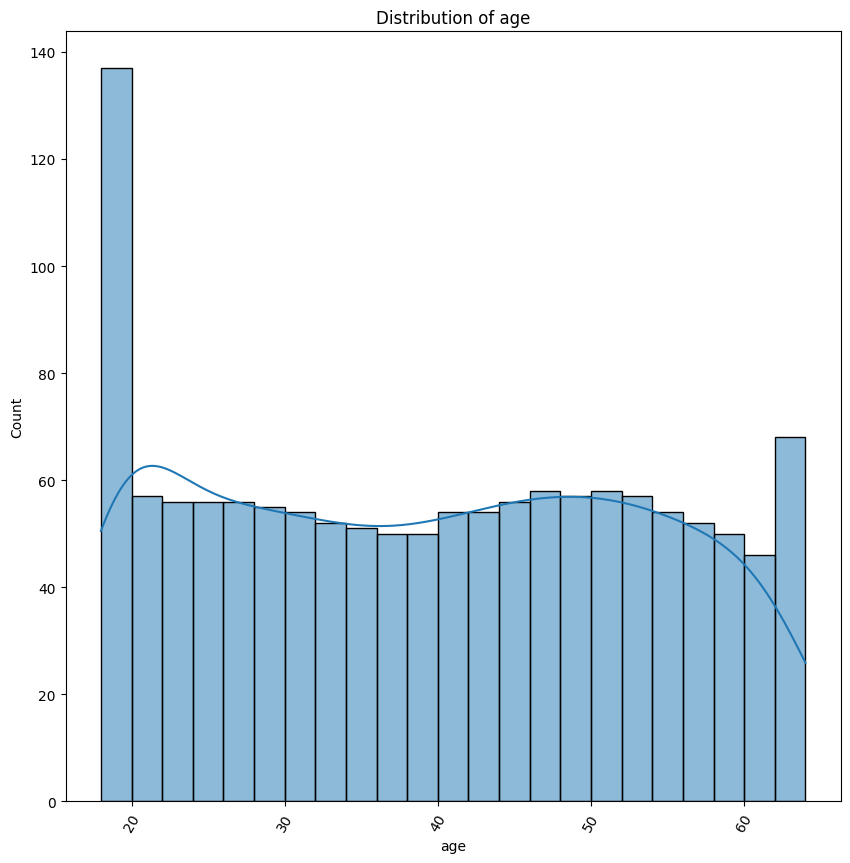

In [12]:
plt.figure(figsize = (10,10))
plt.title('Distribution of age')
sns.histplot(data = df,
             x = 'age',
             binwidth =2,
             kde = True)

plt.xticks(rotation = 60);


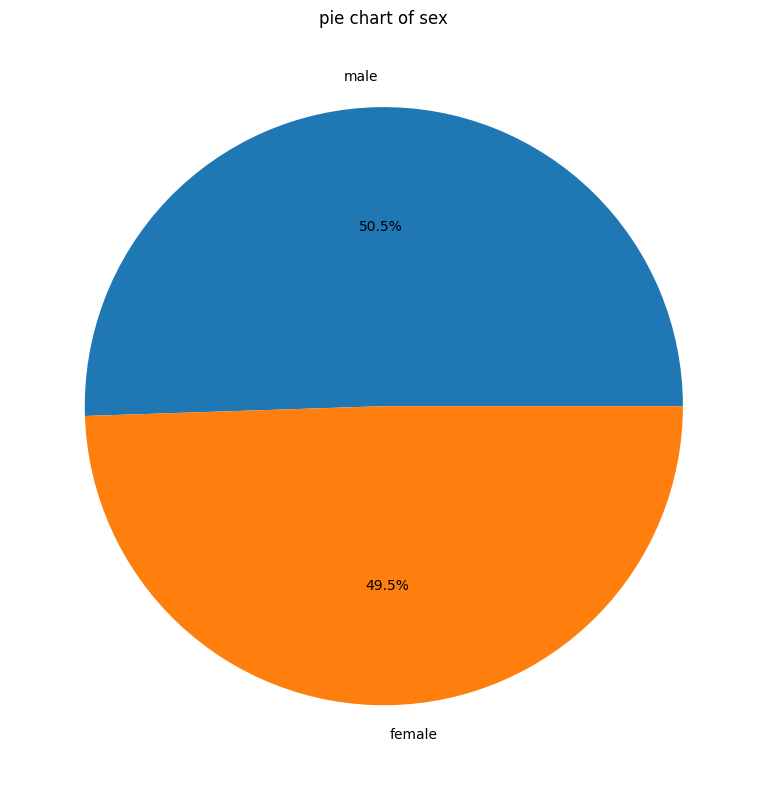

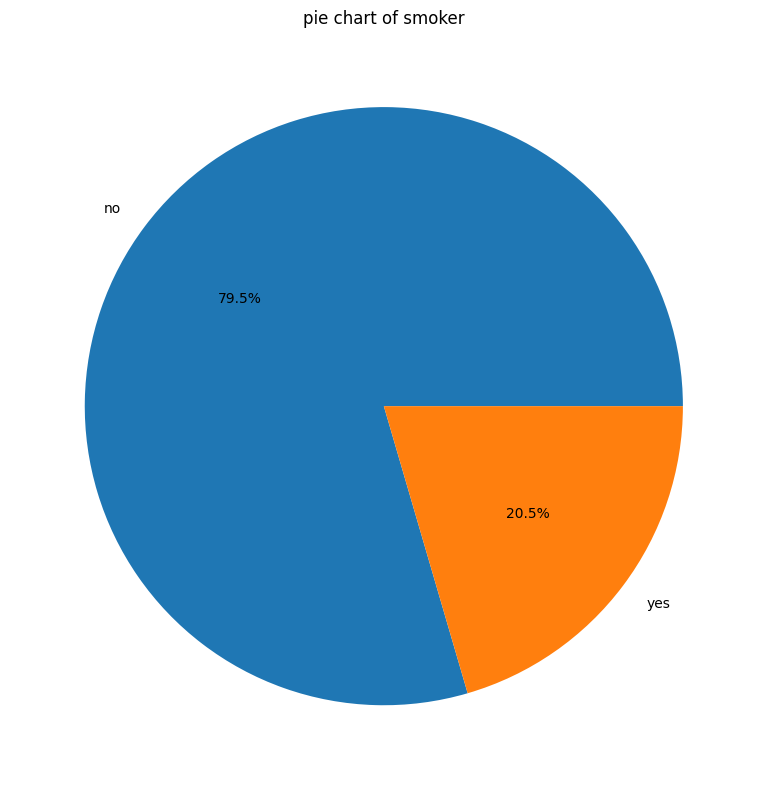

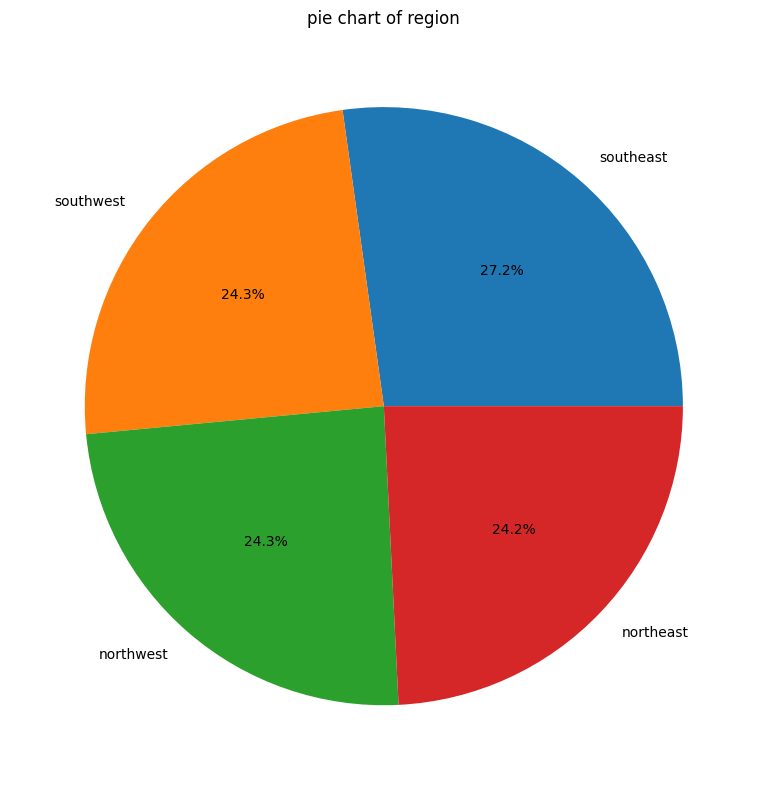

In [13]:
# pie chart of categorical columns
for i,col in enumerate(cat_cols):
    plt.figure(figsize = (8,8))
    plt.title(label= f'pie chart of {col}',
              loc = 'center')
    #plt.subplot(3,1,i+1)
    plt.pie(df[col].value_counts(),
            labels=df[col].value_counts().index,  
            autopct = '%1.1f%%')
    plt.tight_layout()

## Distribution of children

In [14]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

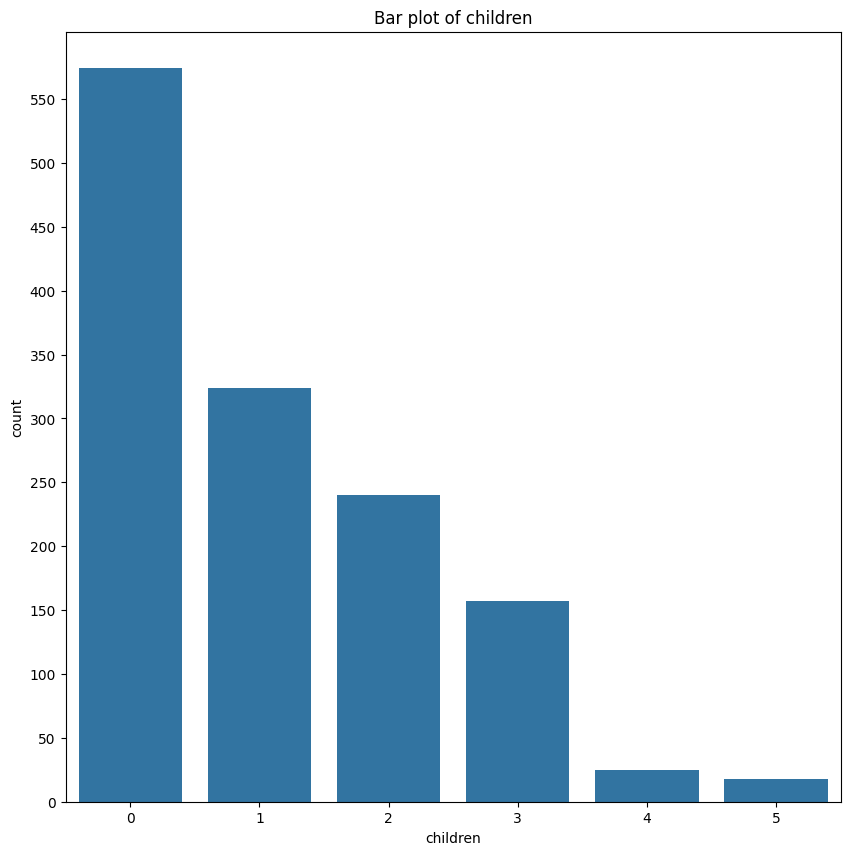

In [15]:
plt.figure(figsize = (10,10))
plt.title('Bar plot of children')
sns.countplot(data = df,
              x = 'children')
plt.yticks(np.arange(0,600,50));

## Distribution of bmi

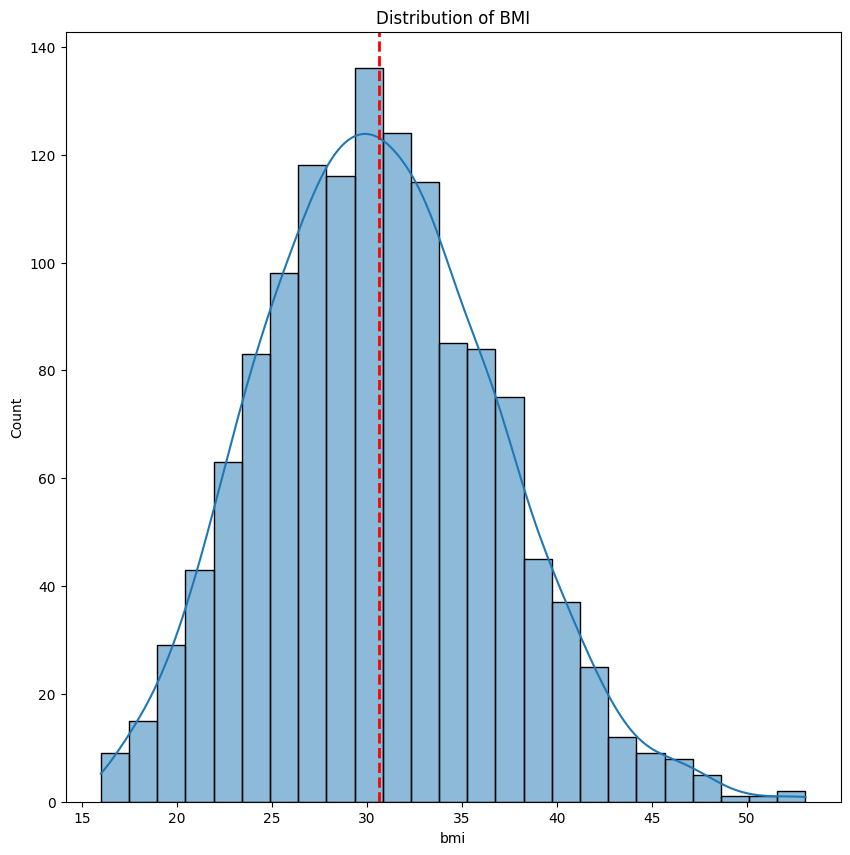

In [16]:
plt.figure(figsize = (10,10))
plt.title('Distribution of BMI')
sns.histplot(data = df,
             x = 'bmi',
             kde = True);
plt.axvline(x = df['bmi'].mean(),linestyle = '--',lw = 2,c = 'r');

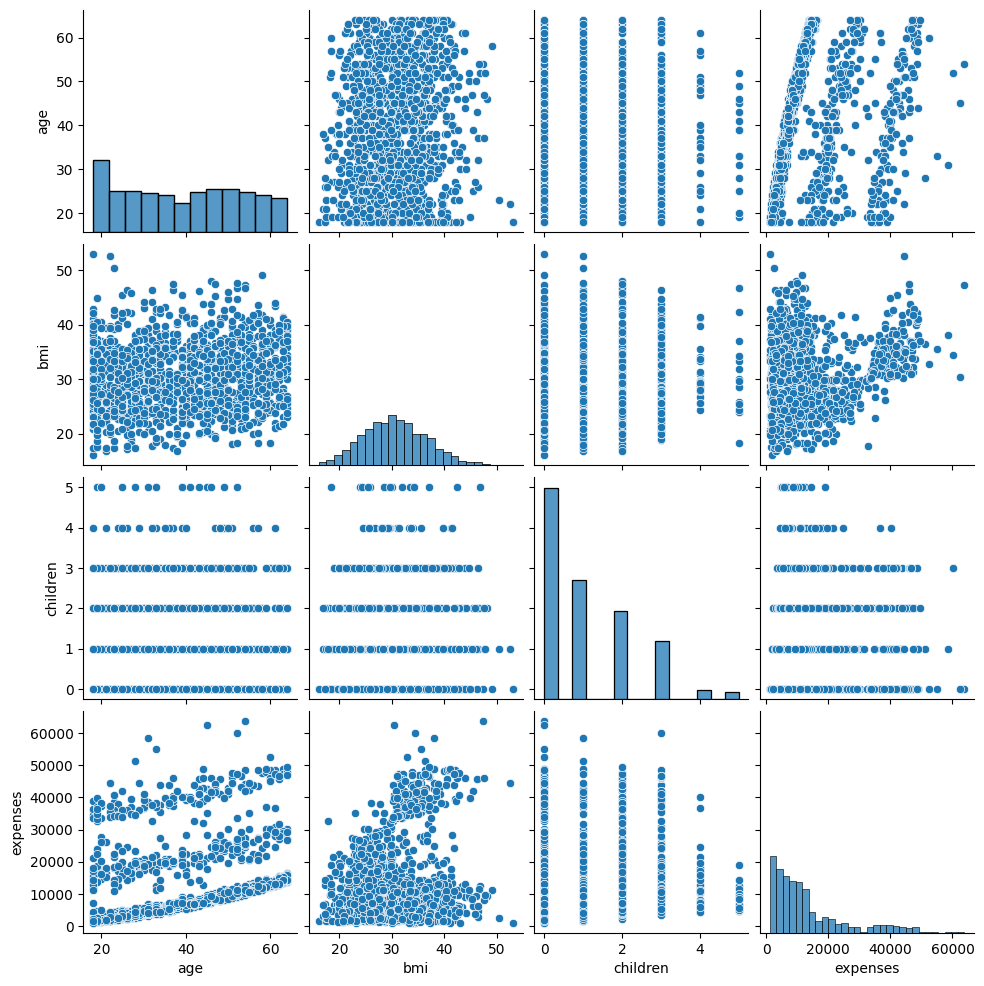

In [17]:
# comparing all the numerical columns with pair plot
sns.pairplot(df)

# checking the relation between smoker,age and expenses

In [18]:
# we are considering mean of expenses grouped by age and smoker
a1 = df.groupby(['smoker','age'])['expenses'].mean().reset_index()

In [19]:
a1.head()

,smoker,age,expenses
0,no,18,3215.162632
1,no,19,3536.713200
2,no,20,3673.113000
3,no,21,3813.530385
4,no,22,2551.017727


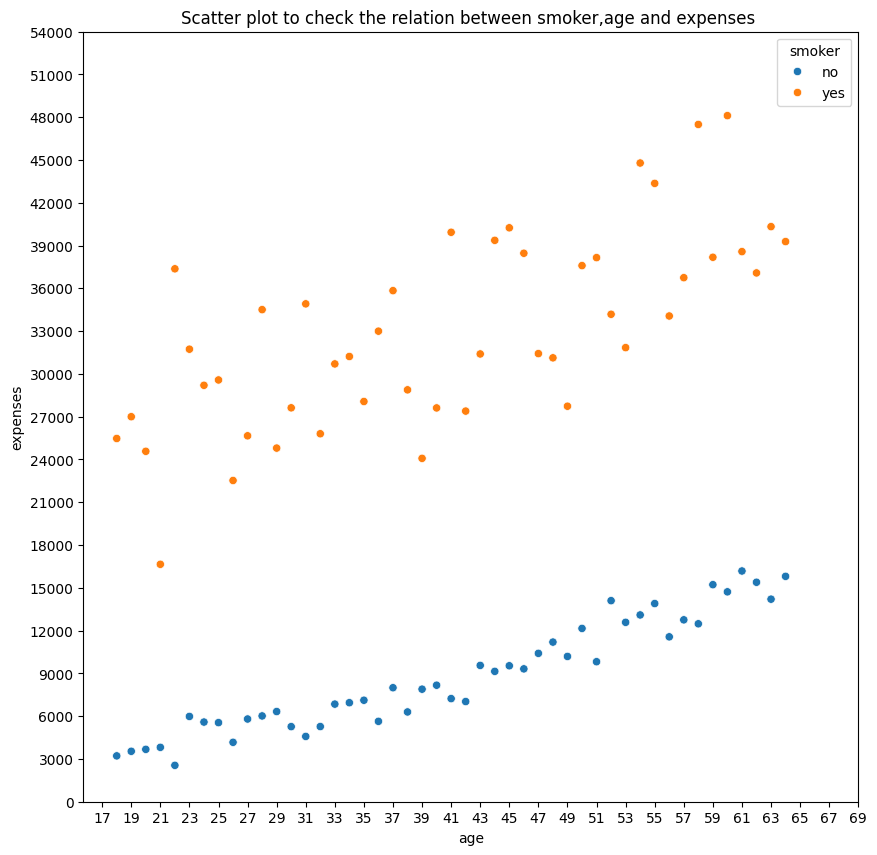

In [20]:
plt.figure(figsize = (10,10))
plt.title('Scatter plot to check the relation between smoker,age and expenses ')
sns.scatterplot(data = a1,
                x = 'age',
                y = 'expenses', 
                hue = 'smoker')
plt.yticks(np.arange(0,55000,3000));
plt.xticks(np.arange(17,70,2));

In [21]:
# checking also with median of expense
a2 = df.groupby(['smoker','age'])['expenses'].median().reset_index()

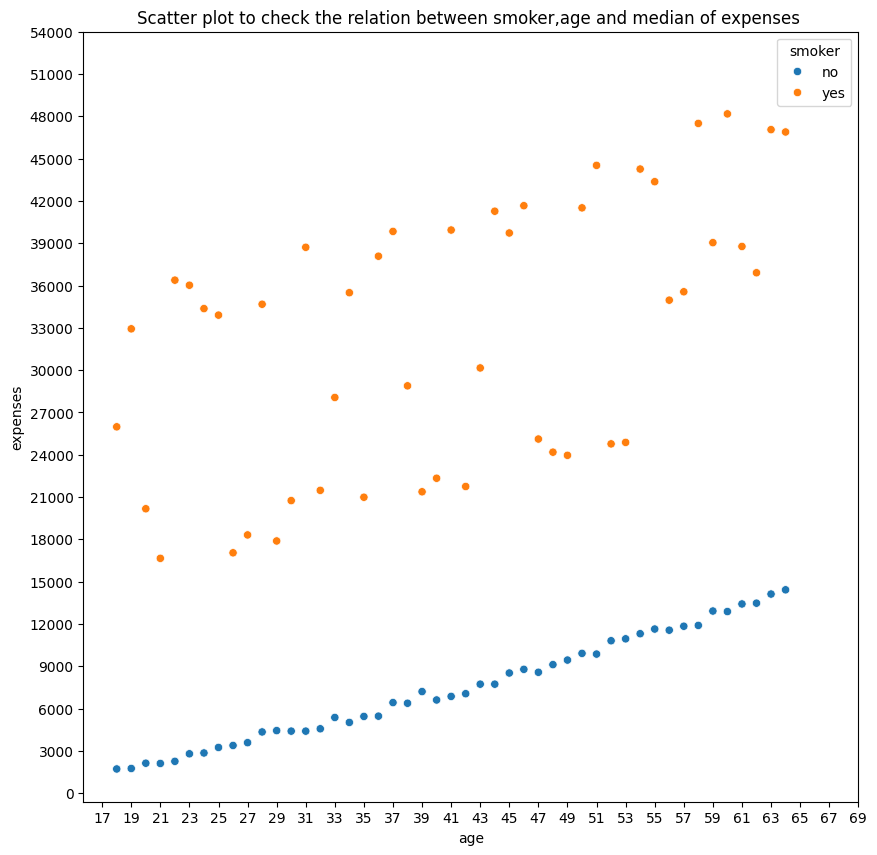

In [22]:
plt.figure(figsize = (10,10))
plt.title('Scatter plot to check the relation between smoker,age and median of expenses ')
sns.scatterplot(data = a2,
                x = 'age',
                y = 'expenses', 
                hue = 'smoker')
plt.yticks(np.arange(0,55000,3000));
plt.xticks(np.arange(17,70,2));

# checking the relation between smoker,age,sex,region and expenses

### using the estimator as mean

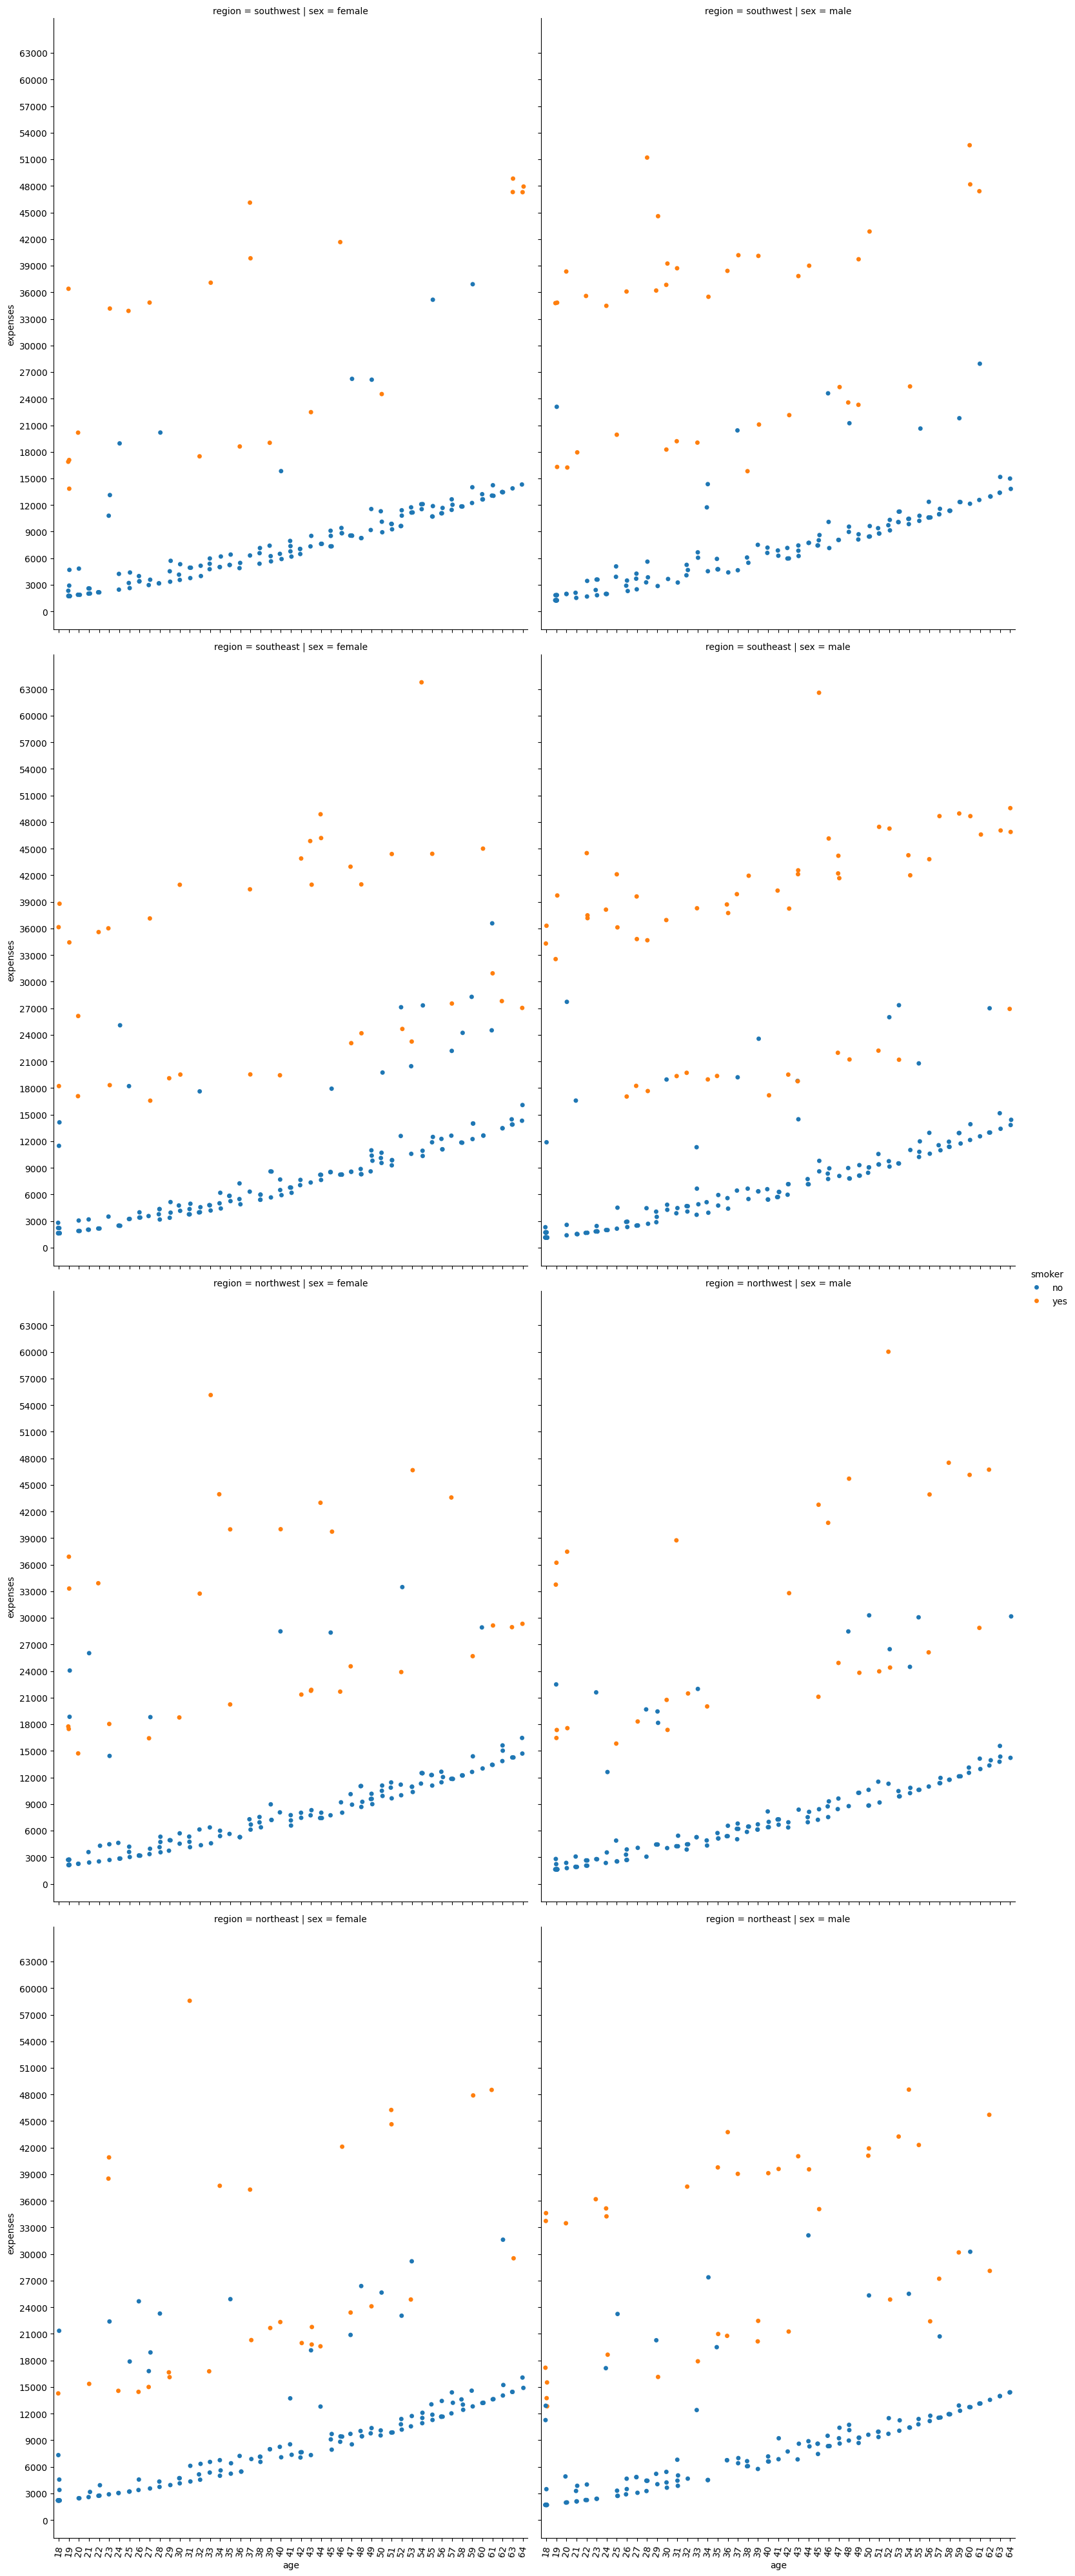

In [23]:
yticks = np.arange(0,64000,3000)
g = sns.catplot(data = df, 
                x = 'age', 
                y = 'expenses', 
                hue = 'smoker', 
                col = 'sex', 
                row = 'region', 
                height = 10, 
                aspect = 0.8,
                legend_out = True);

for ax in g.axes.flatten():
    ax.set_yticks(yticks)
    for label in ax.get_xticklabels():
        label.set_rotation(80)

#### using the estimator as median

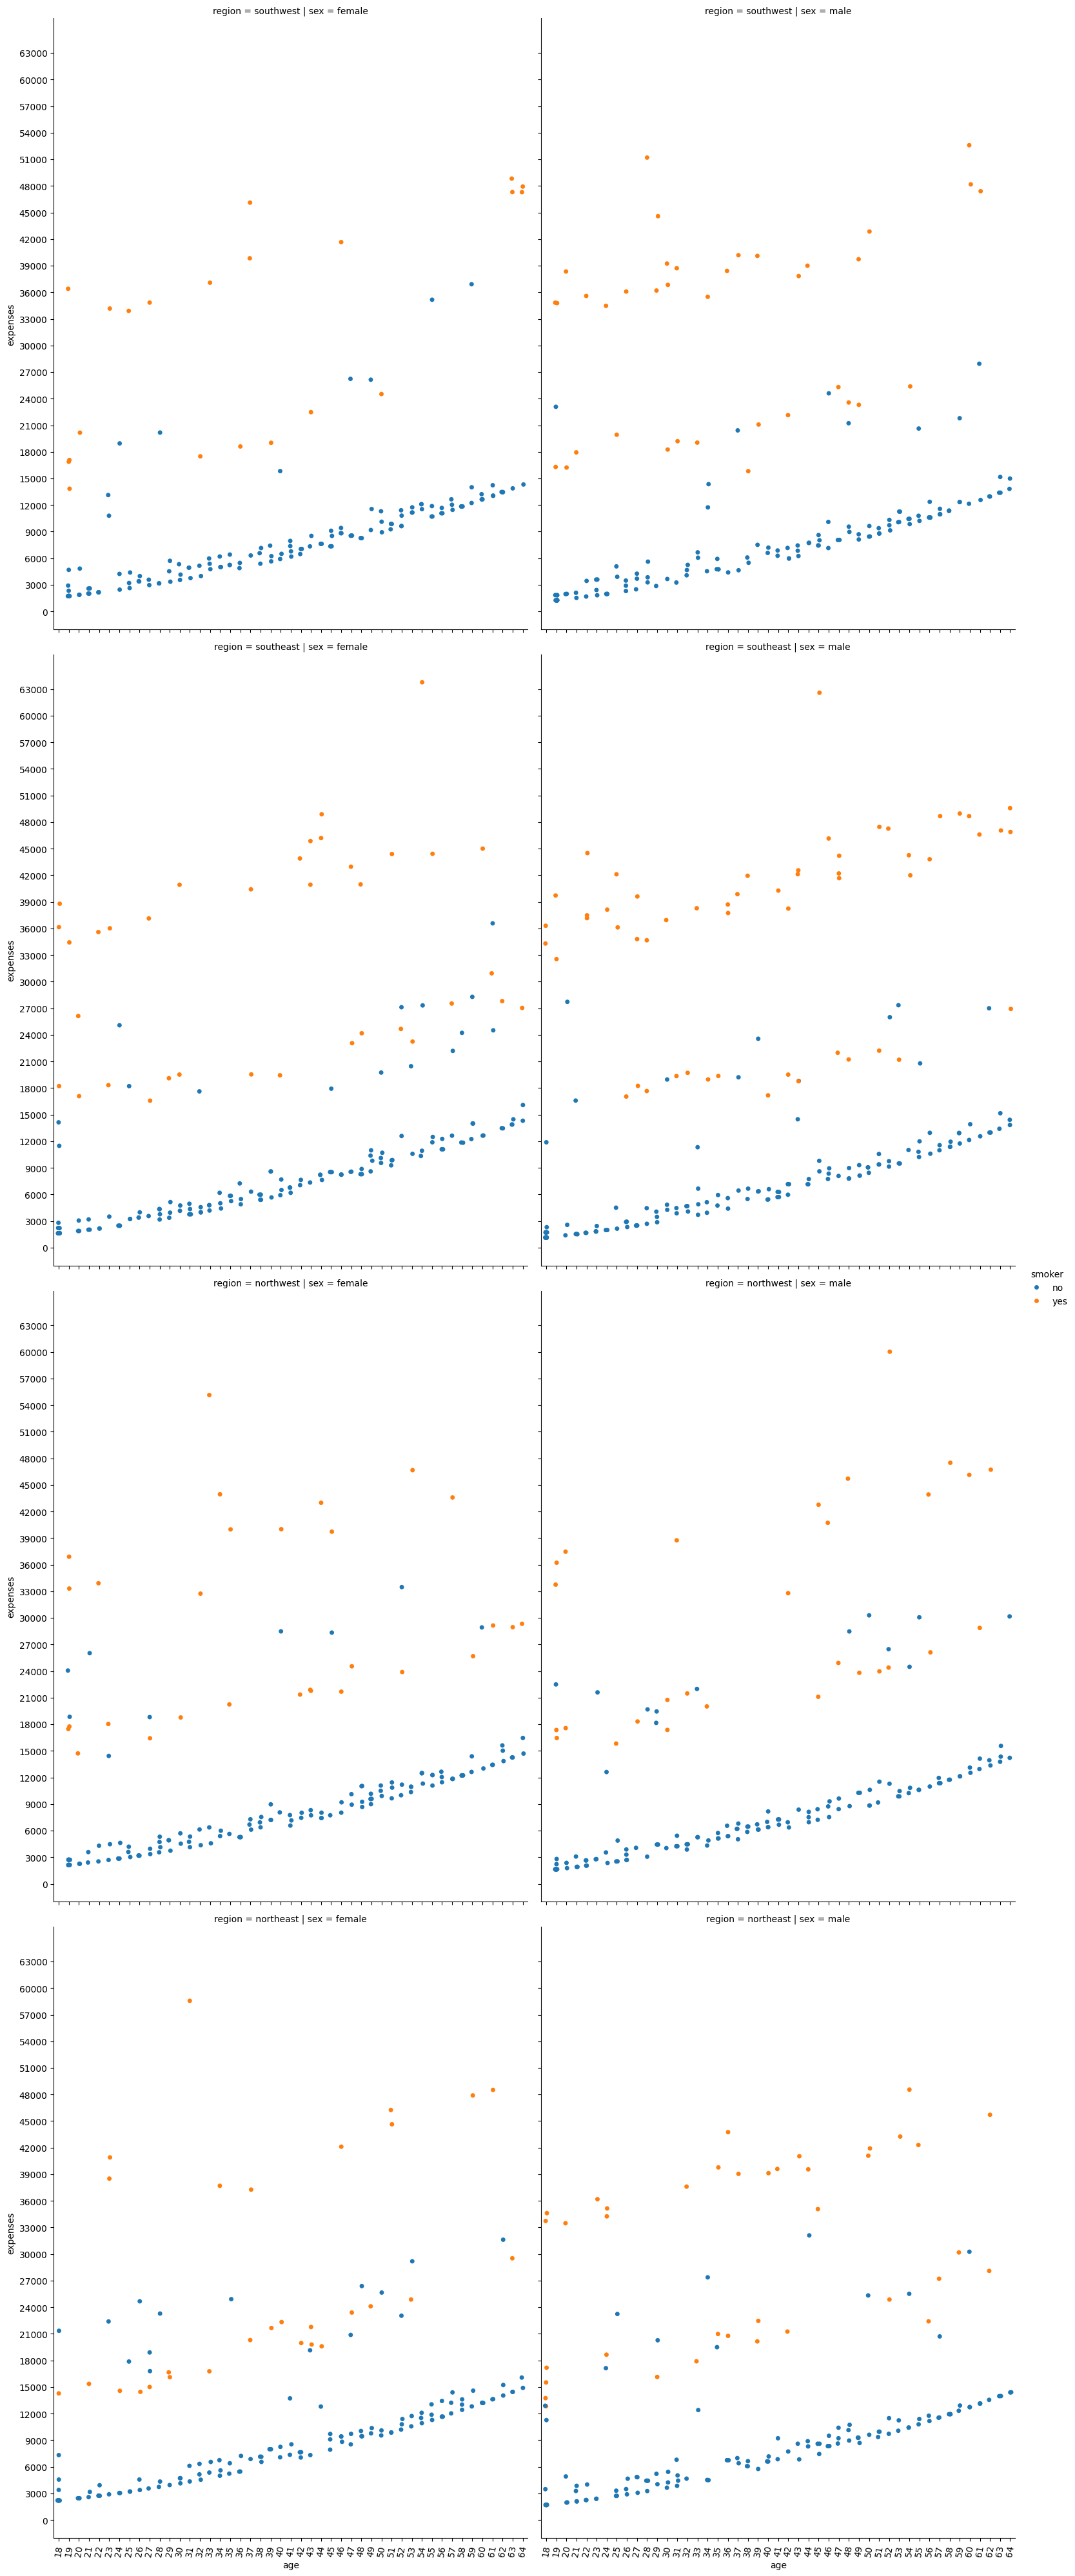

In [24]:
yticks = np.arange(0,64000,3000)
g = sns.catplot(data = df, 
                x = 'age', 
                y = 'expenses', 
                hue = 'smoker', 
                col = 'sex', 
                row = 'region', 
                estimator = 'median',
                height = 10, 
                aspect = 0.8,
                legend_out = True);

for ax in g.axes.flatten():
    ax.set_yticks(yticks)
    for label in ax.get_xticklabels():
        label.set_rotation(80)

## how number of children affects the expenses and also if the person is smoker

In [25]:
a3 = df[df['smoker']=='yes']

In [26]:
a3.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
11,62,female,26.3,0,yes,southeast,27808.73
14,27,male,42.1,0,yes,southeast,39611.76
19,30,male,35.3,0,yes,southwest,36837.47
23,34,female,31.9,1,yes,northeast,37701.88


In [27]:
# considering the mean of expenses for the group of age and children
a3_plot = a3.groupby(['age','children'])['expenses'].mean().reset_index()

In [28]:
a3_plot.head()

,age,children,expenses
0,18,0,27893.751250
1,18,1,17178.680000
2,18,2,23566.315000
3,18,3,18223.450000
4,19,0,27073.358125


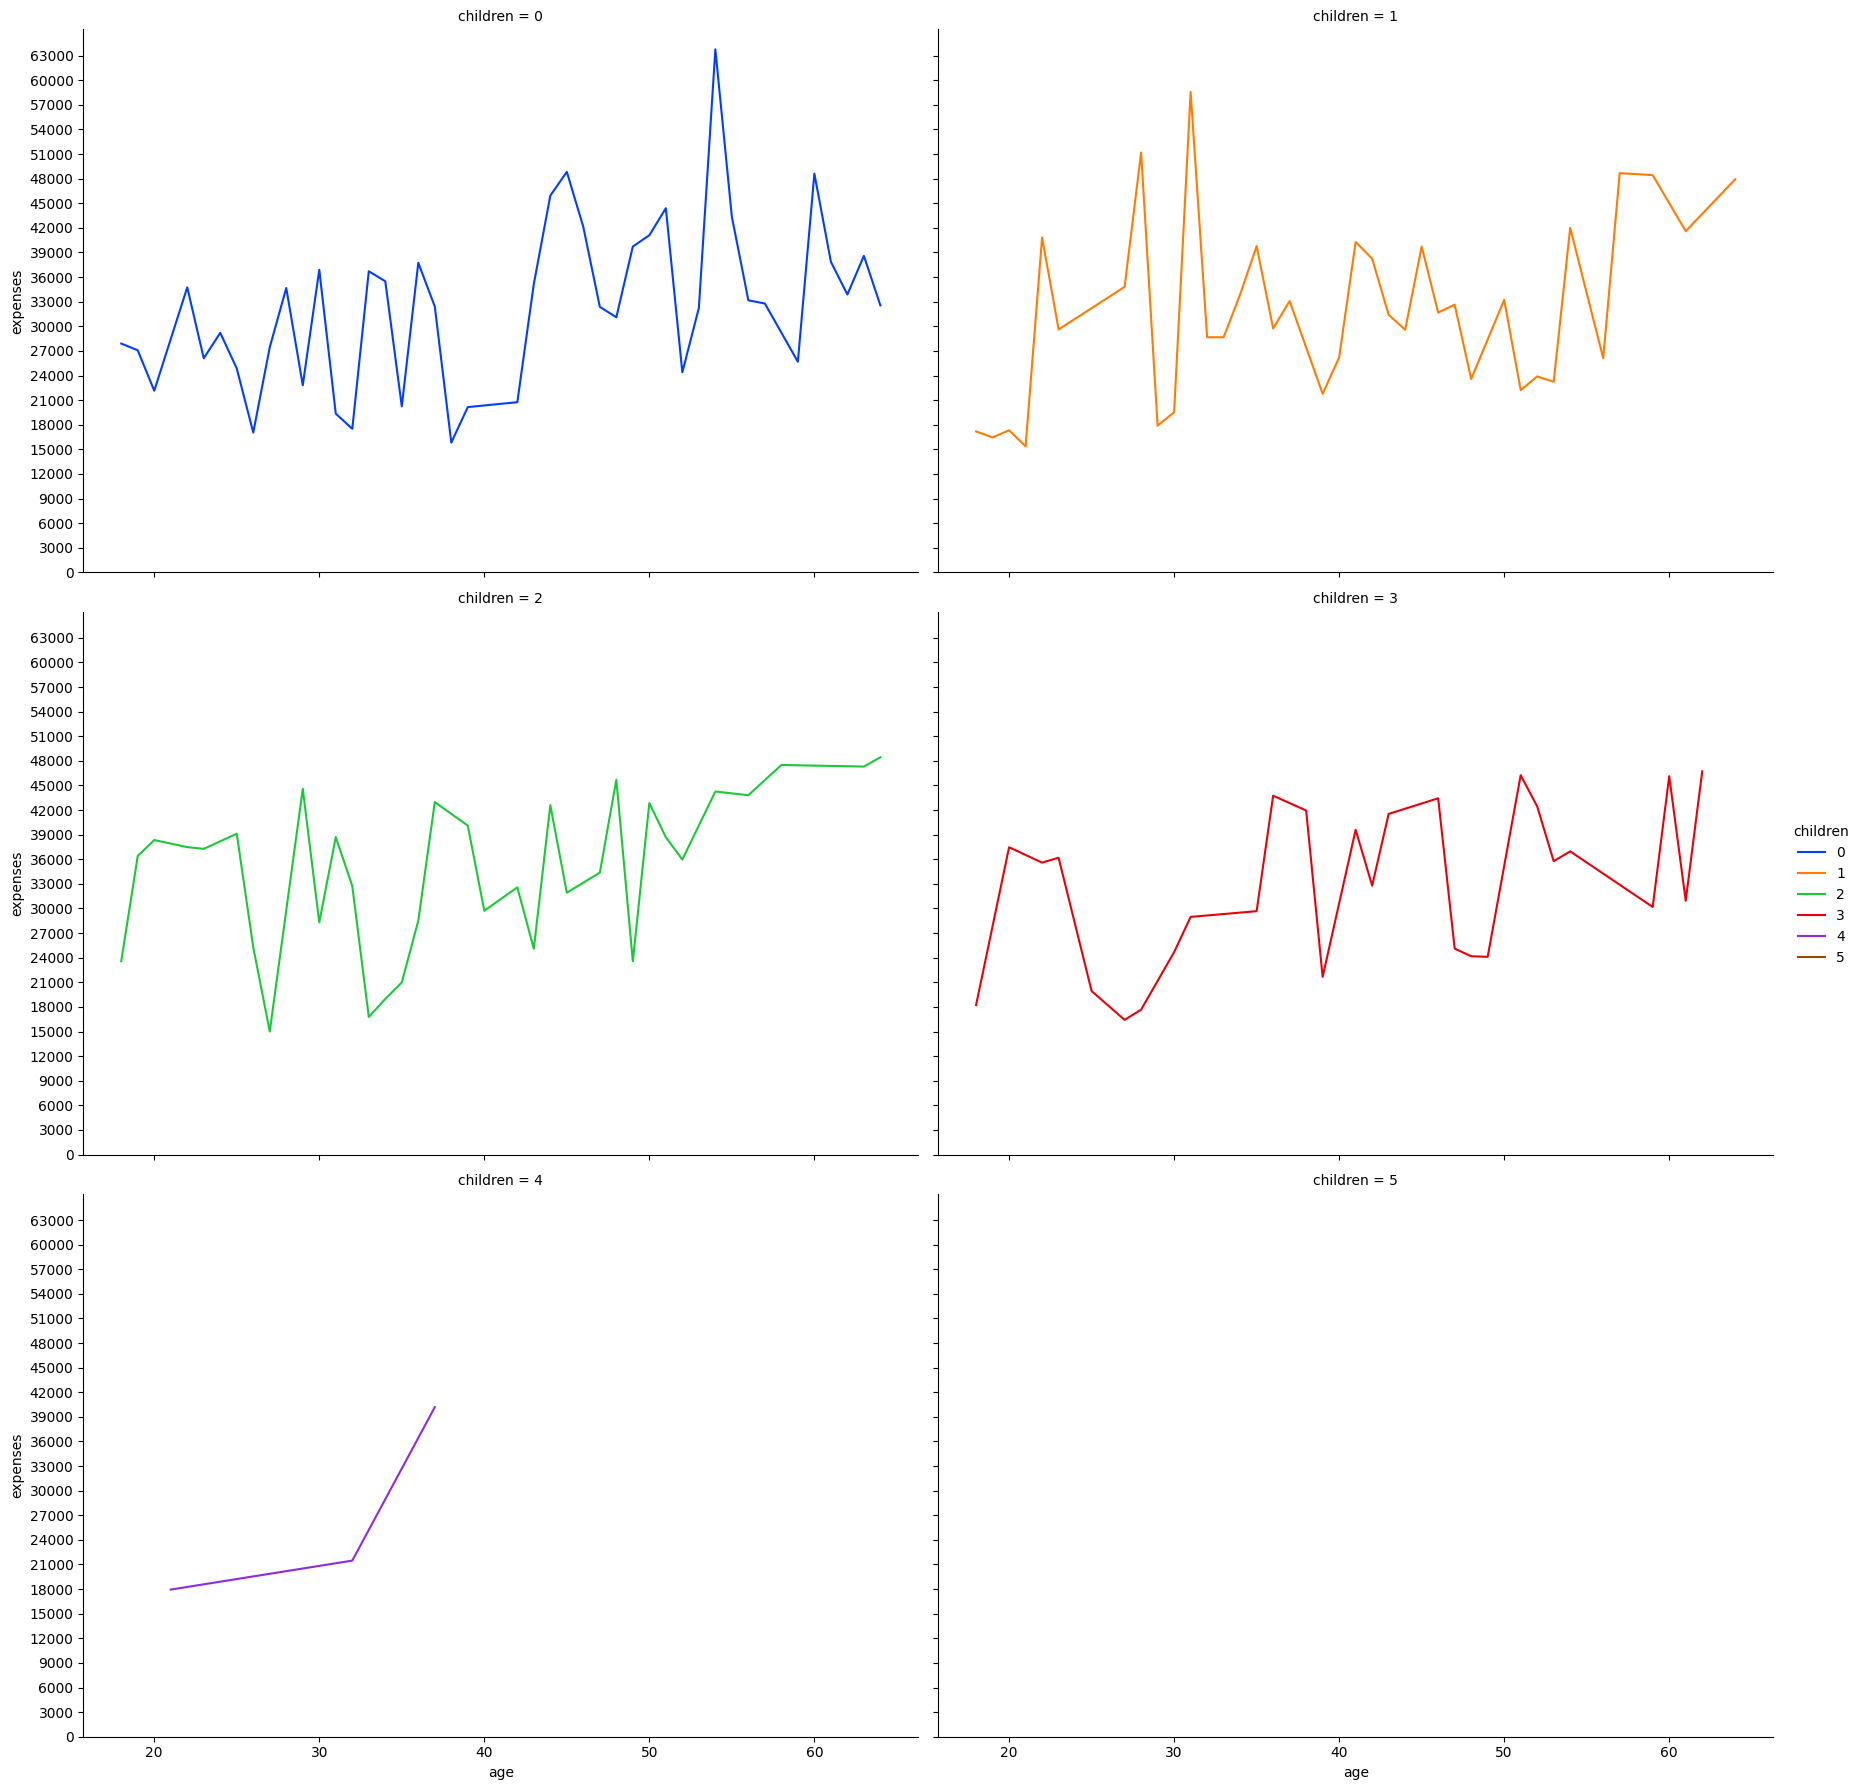

In [29]:
yticks = np.arange(0,64000,3000)

sns.relplot(data = a3_plot, 
            x = 'age', 
            y = 'expenses', 
            hue = 'children',
            col = 'children',
            col_wrap = 2,
            kind = 'line',
            height = 6,
            aspect = 1.5, 
            palette = 'bright')

plt.yticks(yticks);

# Premium Expenses as per the region

In [30]:
# considering the mean of expenses for the group of age and region
a5 = df.groupby(['region','age'])['expenses'].mean().reset_index()

In [31]:
a5.head()

,region,age,expenses
0,northeast,18,7558.733125
1,northeast,20,7876.546667
2,northeast,21,4637.122857
3,northeast,22,2952.242857
4,northeast,23,20813.061429


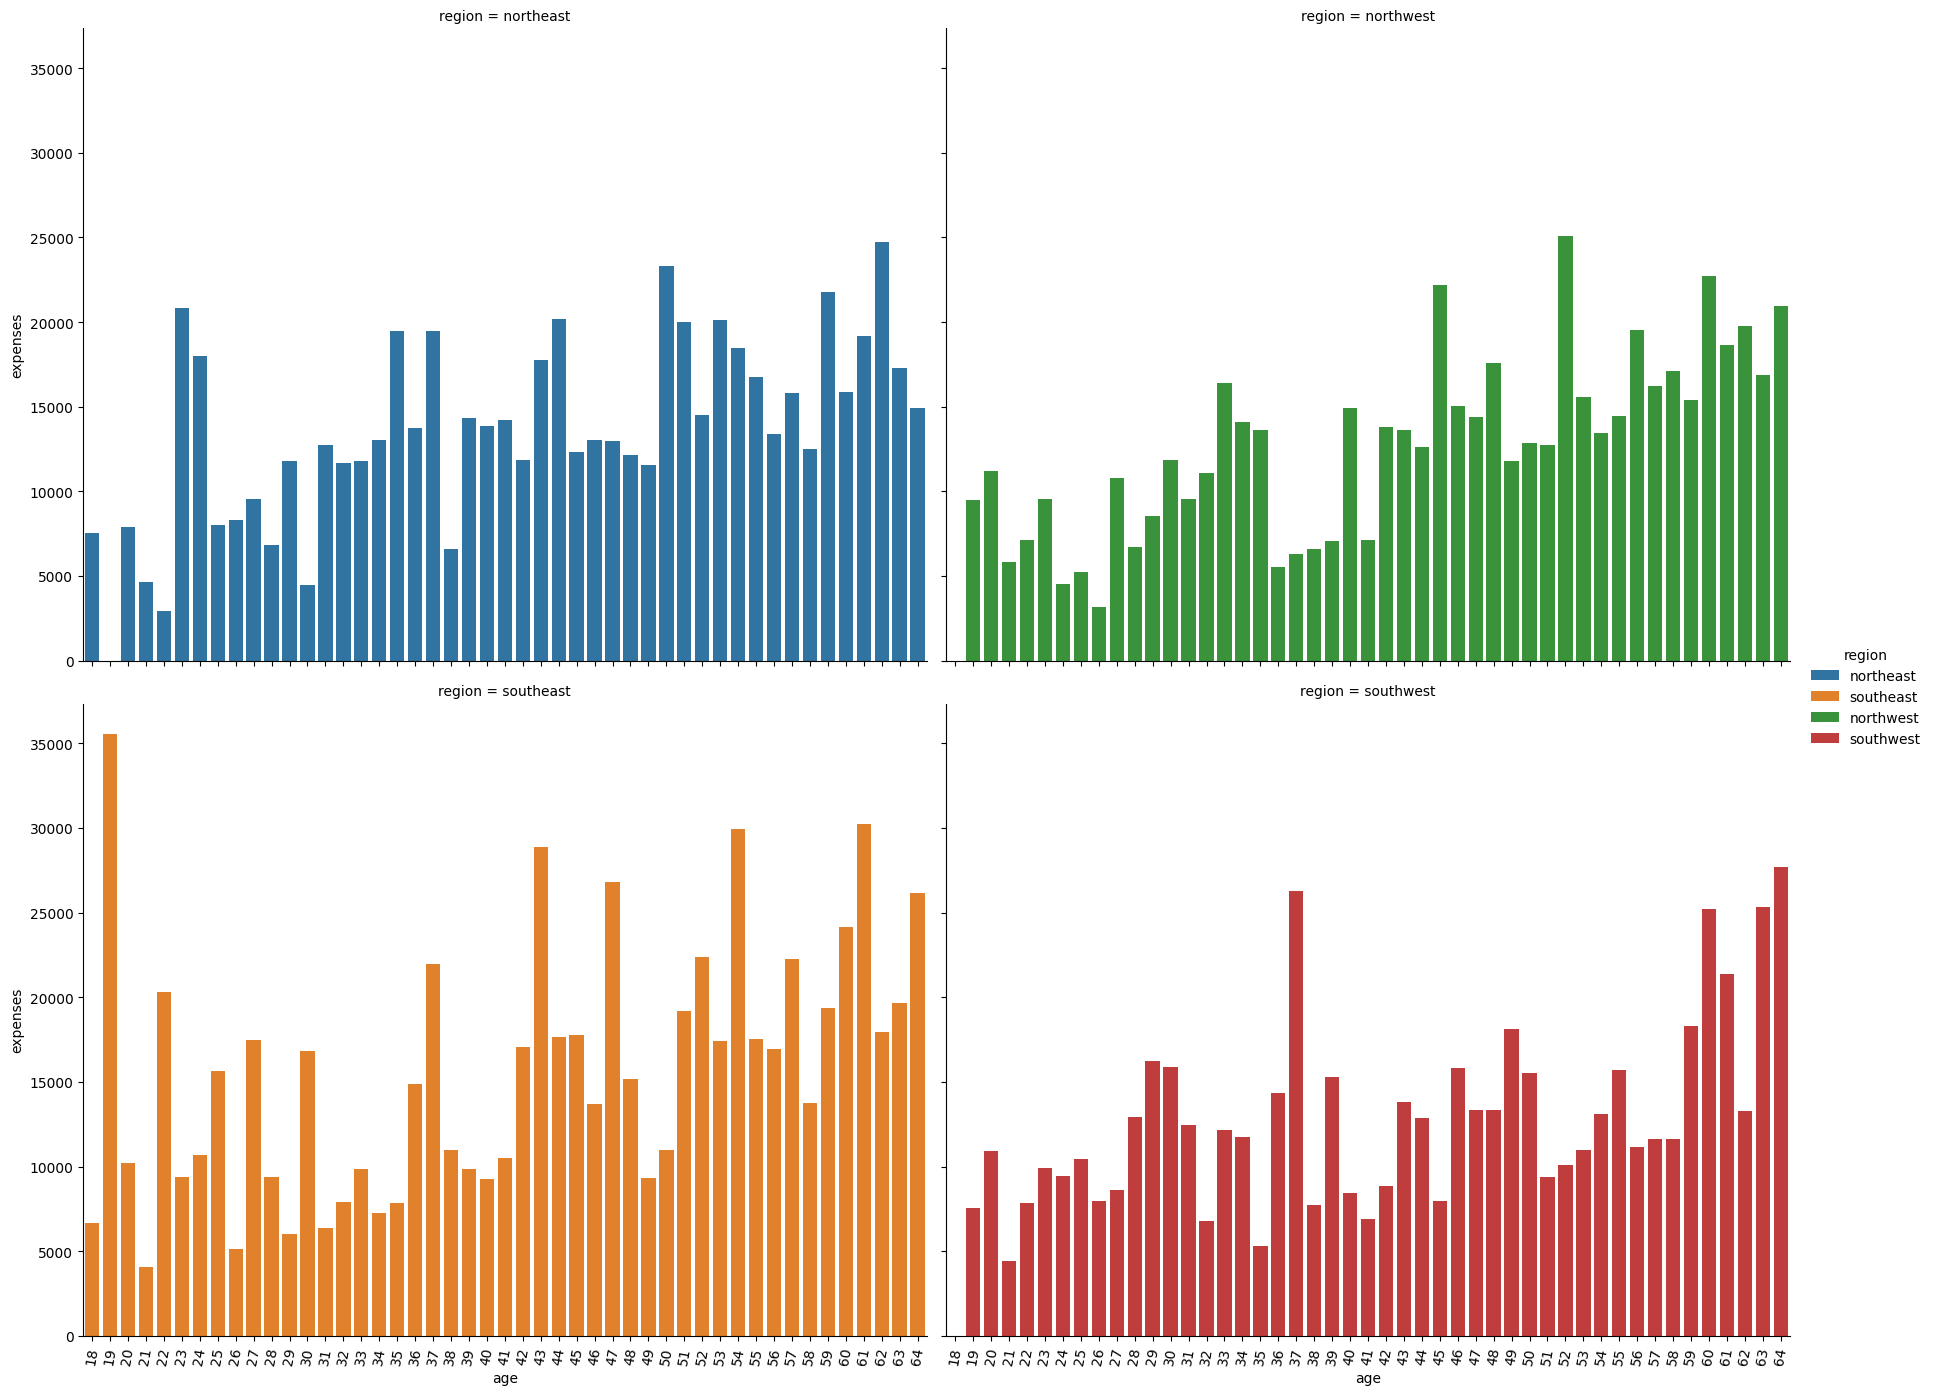

In [32]:
g = sns.catplot(data = a5, 
                x = 'age', 
                y = 'expenses', 
                hue = 'region', 
                col = 'region',
                col_wrap = 2,
                kind = 'bar',
                height = 7,
                aspect = 1.3)
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(80)

In [33]:
df.groupby(['smoker','region'])['expenses'].mean().sort_values(ascending = False)

smoker  region   
yes     southeast    34844.997253
        southwest    32269.064138
        northwest    30192.002759
        northeast    29673.536269
no      northeast     9165.531946
        northwest     8556.463558
        southeast     8032.216300
        southwest     8019.285019
Name: expenses, dtype: float64

In [34]:
df.groupby(['smoker','region'])['expenses'].median().sort_values(ascending = False)

smoker  region   
yes     southeast    37484.450
        southwest    35165.255
        northeast    28101.330
        northwest    27488.995
no      northeast     8342.910
        southwest     7348.140
        northwest     7256.720
        southeast     6652.530
Name: expenses, dtype: float64

# To check how BMI is affecting the expenses

In [35]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


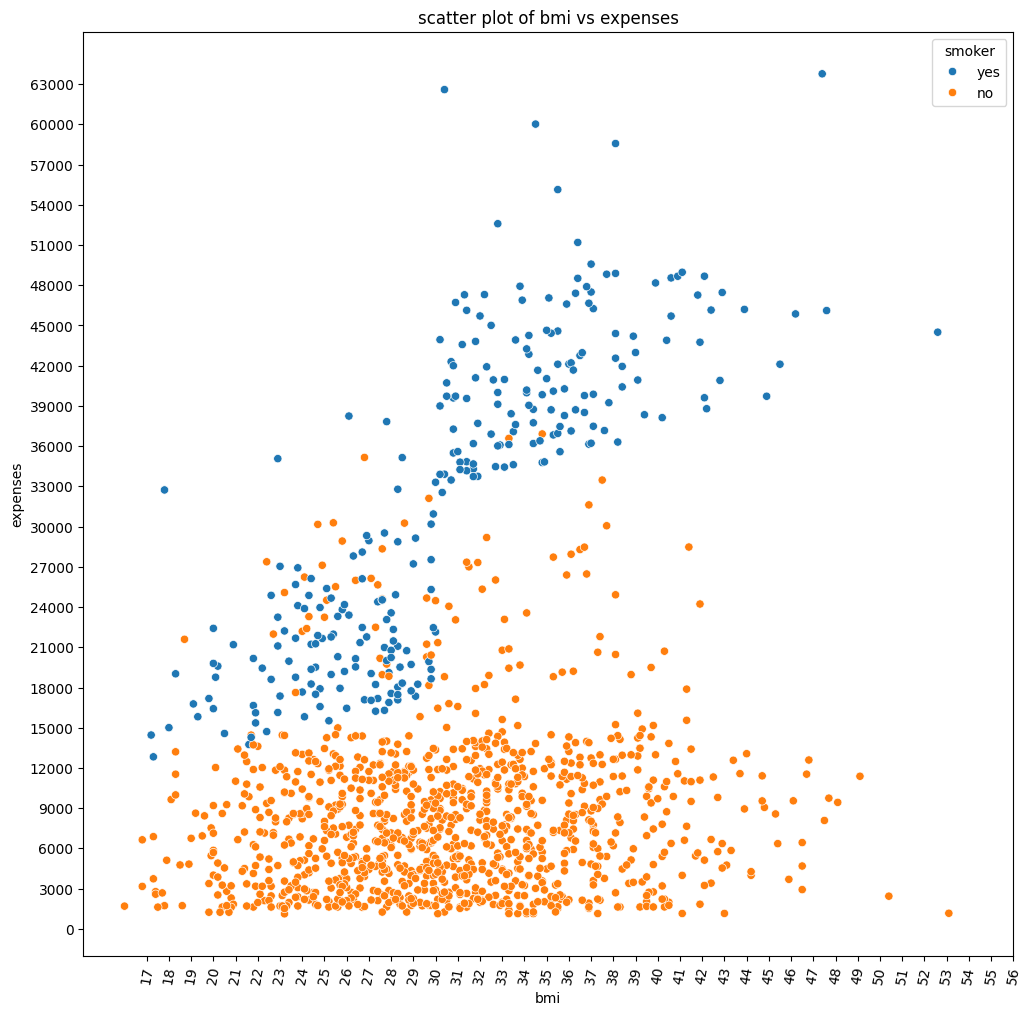

In [37]:
plt.figure(figsize = (12,12))
plt.title('scatter plot of bmi vs expenses')
sns.scatterplot(data = df, 
                x = 'bmi', 
                y = 'expenses',
                hue = 'smoker')
plt.xticks(np.arange(17,57,1),rotation = 80);
plt.yticks(np.arange(0,64000,3000));

# CONCLUSIONS

### from this EDA we can conclude that, The person who is a smoker is paying high premium